
# 项目：Stack OverFlow2018年数据处理

## 目录
<ul>
<li><a href="#1">17年18年数据对比查看</a></li>
<li><a href="#2">从原数据中提取需要的2018年数据</a></li>
<li><a href="#3">数据清洗步骤</a></li>
<li><a href="#4">数据整合</a></li>
<li><a href="#5">EDA</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import re
import sys

sys.path.append("preprocess.py")

import preprocess

In [24]:
df_2018 = pd.read_csv('survey_results_public.csv')

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df_2017 = pd.read_csv('survey_results_public_2017.csv')

In [3]:
df_2018.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

In [16]:
df_2018.shape

(98855, 129)

In [17]:
df_2018.drop(['Currency','MilitaryUS','SurveyTooLong','SurveyEasy','SexualOrientation','HoursOutside','ErgonomicDevices','Dependents', 'EducationParents','HopeFiveYears','SalaryType','NumberMonitors','NumberMonitors','VersionControl','CheckInCode', 'EthicsChoice','EthicsReport','EthicsResponsible','EthicalImplications','JobContactPriorities1','JobContactPriorities2', 'JobContactPriorities3','JobContactPriorities4','JobContactPriorities5','JobEmailPriorities1','JobEmailPriorities2', 'JobEmailPriorities3','JobEmailPriorities4','JobEmailPriorities5','JobEmailPriorities6','JobEmailPriorities7'],axis= 1, inplace=True)

In [18]:
df_2018.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'JobSearchStatus', 'LastNewJob', 'AssessJob1',
       'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6',
       'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10',
       'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3',
       'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6',
       'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9',
       'AssessBenefits10', 'AssessBenefits11', 'UpdateCV', 'Salary',
       'ConvertedSalary', 'CurrencySymbol', 'CommunicationTools',
       'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes',
       'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1',
       'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorked

In [19]:
df_2018.shape

(98855, 99)

<a id='1'></a>
### 17年18年数据对比查看

对比查看代码见另一个Ipynb：compare

<a id='2'></a>
## 从原数据中提取需要的2018年数据

In [46]:
df_2018_clean = pd.DataFrame()

In [47]:
out_columns = ['Student','Employment','FormalEducation','UndergradMajor','Gender','SkipMeals','RaceEthnicity','Age','Country',
              'ConvertedSalary','SalaryType','CurrencySymbol','CompanySize','DevType','JobSatisfaction','CareerSatisfaction',
              'JobSearchStatus','CommunicationTools','YearsCoding','LanguageWorkedWith','LanguageDesireNextYear',
              'DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','Methodology','Hobby',
              'OpenSource','AgreeDisagree1','AgreeDisagree2','AgreeDisagree3','UpdateCV','LastNewJob','SelfTaughtTypes','HackathonReasons',
               'TimeAfterBootcamp','EducationTypes','HoursComputer']

In [48]:
df_2018_clean = df_2018[out_columns]
df_2018_clean['year'] = 2018

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
df_2018_clean.head()

,Student,Employment,FormalEducation,UndergradMajor,Gender,SkipMeals,RaceEthnicity,Age,Country,ConvertedSalary,...,AgreeDisagree2,AgreeDisagree3,UpdateCV,LastNewJob,SelfTaughtTypes,HackathonReasons,TimeAfterBootcamp,EducationTypes,HoursComputer,year
0,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Male,Never,Black or of African descent,25 - 34 years old,Kenya,NaN,...,Strongly agree,Neither Agree nor Disagree,My job status or other personal status changed,Less than a year ago,The official documentation and/or standards fo...,To build my professional network,NaN,"Taught yourself a new language, framework, or ...",9 - 12 hours,2018
1,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Male,Never,White or of European descent,35 - 44 years old,United Kingdom,70841.0,...,Agree,Neither Agree nor Disagree,I saw an employer’s advertisement,More than 4 years ago,The official documentation and/or standards fo...,NaN,NaN,"Taught yourself a new language, framework, or ...",5 - 8 hours,2018
2,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,Less than a year ago,NaN,NaN,NaN,NaN,NaN,2018
3,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Male,3 - 4 times per week,White or of European descent,35 - 44 years old,United States,NaN,...,Disagree,Strongly disagree,A recruiter contacted me,Less than a year ago,The official documentation and/or standards fo...,NaN,NaN,Completed an industry certification program (e...,9 - 12 hours,2018
4,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Male,Never,White or of European descent,18 - 24 years old,South Africa,21426.0,...,Agree,Strongly disagree,My job status or other personal status changed,Between 1 and 2 years ago,The official documentation and/or standards fo...,NaN,NaN,Taken a part-time in-person course in programm...,Over 12 hours,2018


In [50]:
df_2018_clean.shape

(98855, 39)

<a id='3'></a>
## 数据清洗步骤
### 保存整合在一起的2018年数据

In [51]:
df_2018_clean.to_csv('stackoverflow_2018.csv',index = False)

In [31]:
df_2018_clean = pd.read_csv('stackoverflow_2018.csv')

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,5,6,7,10,11,12,14,15,16,17,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### FormalEducation列的处理，跟17年统一

In [52]:
df_2018_clean['FormalEducation'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              43659
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           21396
Some college/university study without earning a degree                                11710
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8951
Associate degree                                                                       2970
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2214
Primary/elementary school                                                              1656
Professional degree (JD, MD, etc.)                                                     1447
I never completed any formal education                                                  700
Name: FormalEducation, dtype: int64

In [53]:
df_2017['FormalEducation'].value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

In [54]:
df_2018_clean['FormalEducation'] = df_2018_clean['FormalEducation'].map({"Bachelor’s degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
                                                                         "Master’s degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree", 
                                                                         "Some college/university study without earning a degree":"Some college/university study without earning a bachelor's degree", 
                                                                         "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary school ",
                                                                         "Associate degree":"Associate degree",
                                                                         "Other doctoral degree (Ph.D, Ed.D., etc.)": "Doctoral degree",
                                                                         "Primary/elementary school":"Primary/elementary school",
                                                                        "Professional degree (JD, MD, etc.)":"Professional degree",
                                                                        "I never completed any formal education":"I never completed any formal education"})


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
df_2018_clean['FormalEducation'].value_counts()

Bachelor's degree                                                    43659
Master's degree                                                      21396
Some college/university study without earning a bachelor's degree    11710
Secondary school                                                      8951
Associate degree                                                      2970
Doctoral degree                                                       2214
Primary/elementary school                                             1656
Professional degree                                                   1447
I never completed any formal education                                 700
Name: FormalEducation, dtype: int64

### Gender列的处理，处理Male和Female列，其他列全部归在一起

In [56]:
df_2018_clean['Gender'].value_counts()

Male                                                                         59458
Female                                                                        4025
Non-binary, genderqueer, or gender non-conforming                              284
Female;Transgender                                                             145
Male;Non-binary, genderqueer, or gender non-conforming                         128
Transgender                                                                    105
Female;Male                                                                     98
Transgender;Non-binary, genderqueer, or gender non-conforming                   51
Female;Non-binary, genderqueer, or gender non-conforming                        50
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       50
Male;Transgender                                                                29
Female;Transgender;Non-binary, genderqueer, or gender non-conforming            24
Fema

In [57]:
df_2018_clean.loc[~df_2018_clean['Gender'].isin(['Male', 'Female']),'Gender']='No_comment'

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [58]:
df_2018_clean.shape

(98855, 39)

In [59]:
df_2018_clean['Gender'].value_counts()

Male          59458
No_comment    35372
Female         4025
Name: Gender, dtype: int64

### JobSearchStatus列的处理，'m中多余空格的删除

In [60]:
df_2018_clean['JobSearchStatus'].value_counts()

I’m not actively looking, but I am open to new opportunities    47556
I am not interested in new job opportunities                    19296
I am actively looking for a job                                 12636
Name: JobSearchStatus, dtype: int64

In [61]:
df_2017['JobSeekingStatus'].value_counts()

I'm not actively looking, but I am open to new opportunities    20729
I am not interested in new job opportunities                     8280
I am actively looking for a job                                  4371
Name: JobSeekingStatus, dtype: int64

In [62]:
df_2018_clean['JobSearchStatus'] = df_2018_clean['JobSearchStatus'].map({"I’m not actively looking, but I am open to new opportunities":"I'm not actively looking, but I am open to new opportunities",
                                                                         "I am not interested in new job opportunities":"I am not interested in new job opportunities", 
                                                                         "Some college/university study without earning a degree":"Some college/university study without earning a bachelor's degree", 
                                                                         "I am actively looking for a job":"I am actively looking for a job"})


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
df_2018_clean['JobSearchStatus'].value_counts()

I'm not actively looking, but I am open to new opportunities    47556
I am not interested in new job opportunities                    19296
I am actively looking for a job                                 12636
Name: JobSearchStatus, dtype: int64

In [9]:
df_2018_clean = pd.read_csv('stackoverflow_2018.csv')

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,6,7,10,11,13,15,16,17,18,20,21,22,23,24,25,26,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_2018_clean.head()

,Student,Employment,FormalEducation,UndergradMajor,Gender,SkipMeals,RaceEthnicity,Age,Country,ConvertedSalary,...,AgreeDisagree2,AgreeDisagree3,UpdateCV,LastNewJob,SelfTaughtTypes,HackathonReasons,TimeAfterBootcamp,EducationTypes,HoursComputer,year
0,No,Employed part-time,Bachelor's degree,Mathematics or statistics,Male,Never,Black or of African descent,25 - 34 years old,Kenya,NaN,...,Strongly agree,Neither Agree nor Disagree,My job status or other personal status changed,Less than a year ago,The official documentation and/or standards fo...,To build my professional network,NaN,"Taught yourself a new language, framework, or ...",9 - 12 hours,2017
1,No,Employed full-time,Bachelor's degree,"A natural science (ex. biology, chemistry, phy...",Male,Never,White or of European descent,35 - 44 years old,United Kingdom,70841.0,...,Agree,Neither Agree nor Disagree,I saw an employer’s advertisement,More than 4 years ago,The official documentation and/or standards fo...,NaN,NaN,"Taught yourself a new language, framework, or ...",5 - 8 hours,2017
2,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",No_comment,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,Less than a year ago,NaN,NaN,NaN,NaN,NaN,2017
3,No,Employed full-time,Bachelor's degree,"Computer science, computer engineering, or sof...",Male,3 - 4 times per week,White or of European descent,35 - 44 years old,United States,NaN,...,Disagree,Strongly disagree,A recruiter contacted me,Less than a year ago,The official documentation and/or standards fo...,NaN,NaN,Completed an industry certification program (e...,9 - 12 hours,2017
4,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Male,Never,White or of European descent,18 - 24 years old,South Africa,21426.0,...,Agree,Strongly disagree,My job status or other personal status changed,Between 1 and 2 years ago,The official documentation and/or standards fo...,NaN,NaN,Taken a part-time in-person course in programm...,Over 12 hours,2017


In [64]:
# 修改列名
df_2018_clean.rename(columns={'Student':'University', 'RaceEthnicity':'Race', 'ConvertedSalary':'Salary','CurrencySymbol':'Currency',
                             'DevType':'DeveloperType','JobSearchStatus':'JobSeekingStatus',
                             'AgreeDisagree1':'CompetePeers','AgreeDisagree2':'NotgoodasPeers','AgreeDisagree3':'KinshipDevelopers'},
                     inplace = True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [65]:
df_2018_clean.head()

,University,Employment,FormalEducation,UndergradMajor,Gender,SkipMeals,Race,Age,Country,Salary,...,NotgoodasPeers,KinshipDevelopers,UpdateCV,LastNewJob,SelfTaughtTypes,HackathonReasons,TimeAfterBootcamp,EducationTypes,HoursComputer,year
0,No,Employed part-time,Bachelor's degree,Mathematics or statistics,Male,Never,Black or of African descent,25 - 34 years old,Kenya,NaN,...,Strongly agree,Neither Agree nor Disagree,My job status or other personal status changed,Less than a year ago,The official documentation and/or standards fo...,To build my professional network,NaN,"Taught yourself a new language, framework, or ...",9 - 12 hours,2018
1,No,Employed full-time,Bachelor's degree,"A natural science (ex. biology, chemistry, phy...",Male,Never,White or of European descent,35 - 44 years old,United Kingdom,70841.0,...,Agree,Neither Agree nor Disagree,I saw an employer’s advertisement,More than 4 years ago,The official documentation and/or standards fo...,NaN,NaN,"Taught yourself a new language, framework, or ...",5 - 8 hours,2018
2,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",No_comment,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,Less than a year ago,NaN,NaN,NaN,NaN,NaN,2018
3,No,Employed full-time,Bachelor's degree,"Computer science, computer engineering, or sof...",Male,3 - 4 times per week,White or of European descent,35 - 44 years old,United States,NaN,...,Disagree,Strongly disagree,A recruiter contacted me,Less than a year ago,The official documentation and/or standards fo...,NaN,NaN,Completed an industry certification program (e...,9 - 12 hours,2018
4,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Male,Never,White or of European descent,18 - 24 years old,South Africa,21426.0,...,Agree,Strongly disagree,My job status or other personal status changed,Between 1 and 2 years ago,The official documentation and/or standards fo...,NaN,NaN,Taken a part-time in-person course in programm...,Over 12 hours,2018


In [66]:
# 修改Gender里面的nocomment
df_2018_clean['Gender'].value_counts()

Male          59458
No_comment    35372
Female         4025
Name: Gender, dtype: int64

In [67]:
df_2018_clean['Gender'] = df_2018_clean['Gender'].map({"Male":"Male","Female":"Female", "No_comment":"NoComment"})

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_2018_clean['Gender'].value_counts()

Male         59458
NoComment    35372
Female        4025
Name: Gender, dtype: int64

In [69]:
# 修改Race
df_2018_clean['Race'].value_counts()

White or of European descent                                                                                                                                                            40541
South Asian                                                                                                                                                                              6213
Hispanic or Latino/Latina                                                                                                                                                                2718
East Asian                                                                                                                                                                               2350
Middle Eastern                                                                                                                                                                           1774
Black or of African descent                       

In [70]:
# 利用正则表达式删除含有‘I dont know’
pattern = re.compile(r"I don't know|I prefer not to say")
df_2018_clean.Race = df_2018_clean.Race.apply(preprocess.convert_single_func, args=(pattern, "NoInfo", True))

D:\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [71]:
# 取出；前一部分
# preprocess是任锐大大写的脚本，很强
df_2018_clean.Race = df_2018_clean.Race.str.split(";").apply(preprocess.convert_list_funct)

D:\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [72]:
df_2018_clean.Race.value_counts()

White or of European descent                                   40541
South Asian                                                     6301
Hispanic or Latino/Latina                                       3678
East Asian                                                      2855
Middle Eastern                                                  2221
Black or of African descent                                     1585
Native American, Pacific Islander, or Indigenous Australian      292
Name: Race, dtype: int64

In [73]:
# 处理18年货币是缩写问题，而且比17年多很多
df_2018_clean.Currency.value_counts().head()

USD    17330
EUR    12781
INR     6633
GBP     4196
CAD     2122
Name: Currency, dtype: int64

In [74]:
df_2018_clean[df_2018_clean.Currency == 'BTC'].Currency.head()

408     BTC
1085    BTC
2836    BTC
5498    BTC
5986    BTC
Name: Currency, dtype: object

In [75]:
df_2018_clean.loc[~df_2018_clean['Currency'].isin(['USD', 'EUR','GBP','JPY','CNY','BRL','INR','MXN','ZAR','SEK',
                                                  'AUD','CAD','SGD','RUB','CHF','BTC']),'Currency']='other currency'

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
df_2017.Currency.value_counts()

NameError: name 'df_2017' is not defined

In [76]:
df_2018_clean['Currency'] = df_2018_clean['Currency'].map({"USD":"U.S. dollars","EUR":"Euros", "GBP":"British pounds sterling",
                                                          'JPY':'Japanese yen','CNY':'Chinese yuan renminbi','BRL':'Brazilian reais','INR':'Indian rupees',
                                                          'MXN':'Mexican pesos','ZAR':'South African rands','SEK':'Swedish kroner','AUD':'Australian dollars',
                                                           'CAD':'Canadian dollars','SGD':'Singapore dollars','RUB ':'Russian rubles','CHF':'Swiss francs',
                                                           'BTC':'Bitcoin','other currency':'other currency'})

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [77]:
df_2018_clean.Currency.value_counts()

other currency             48352
U.S. dollars               17330
Euros                      12781
Indian rupees               6633
British pounds sterling     4196
Canadian dollars            2122
Brazilian reais             1477
Australian dollars          1308
Swedish kroner               789
Swiss francs                 639
South African rands          423
Mexican pesos                408
Chinese yuan renminbi        389
Singapore dollars            215
Japanese yen                 200
Bitcoin                      109
Name: Currency, dtype: int64

In [78]:
df_2018_clean.CompanySize.value_counts()

20 to 99 employees          16996
100 to 499 employees        14011
10,000 or more employees     9757
10 to 19 employees           8007
1,000 to 4,999 employees     7634
Fewer than 10 employees      7479
500 to 999 employees         4630
5,000 to 9,999 employees     3017
Name: CompanySize, dtype: int64

In [79]:
df_2018_clean.to_csv('stackoverflow_2018.csv',index = False)

In [80]:
# DeveloperType待确认后处理
df_2018_clean.DeveloperType.value_counts()

Back-end developer                                                                                                                                                                                                                                                                                                     6417
Full-stack developer                                                                                                                                                                                                                                                                                                   6104
Back-end developer;Front-end developer;Full-stack developer                                                                                                                                                                                                                                                            4460
Mobile developer                                    

In [81]:
# JobSeekingStatus2018不用修改
df_2018_clean.JobSeekingStatus.value_counts()

I'm not actively looking, but I am open to new opportunities    47556
I am not interested in new job opportunities                    19296
I am actively looking for a job                                 12636
Name: JobSeekingStatus, dtype: int64

In [82]:
# YearsCoding2018不用修改
df_2018_clean.YearsCoding.value_counts()

3-5 years           23313
6-8 years           19338
9-11 years          12169
0-2 years           10682
12-14 years          8030
15-17 years          6117
18-20 years          5072
30 or more years     3544
21-23 years          2648
24-26 years          1862
27-29 years          1060
Name: YearsCoding, dtype: int64

In [9]:
df_2018_clean.loc[~df_2018_clean['YearsCoding'].isin(['3-5 years', '6-8 years','9-11 years','0-2 years','12-14 years','15-17 years',
                                                     '18-20 years']),'YearsCoding']='20 or more years'

In [10]:
df_2018_clean.YearsCoding.value_counts()

3-5 years           23313
6-8 years           19338
20 or more years    14134
9-11 years          12169
0-2 years           10682
12-14 years          8030
15-17 years          6117
18-20 years          5072
Name: YearsCoding, dtype: int64

In [11]:
df_2018_clean.to_csv('stackoverflow_2018.csv',index = False)

In [8]:
df_2018_clean = pd.read_csv('stackoverflow_2018.csv')

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,6,7,10,12,14,15,16,17,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 对拿到的2017年的数据进行预处理

In [12]:
df2018 = pd.read_csv('stackoverflow_2018.csv')

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,6,7,10,12,14,15,16,17,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df2017 = pd.read_csv('survey2017.csv')

In [13]:
df2018.YearsCoding.value_counts()

3-5 years           23313
6-8 years           19338
20 or more years    14134
9-11 years          12169
0-2 years           10682
12-14 years          8030
15-17 years          6117
18-20 years          5072
Name: YearsCoding, dtype: int64

In [7]:
df2017.YearsCoding.value_counts()

1 to 2 years        5368
2 to 3 years        4845
3 to 4 years        4067
4 to 5 years        3471
20 or more years    3221
Less than a year    3089
5 to 6 years        3038
9 to 10 years       2015
6 to 7 years        1940
10 to 11 years      1728
7 to 8 years        1682
8 to 9 years        1315
15 to 16 years       885
14 to 15 years       879
11 to 12 years       865
12 to 13 years       761
16 to 17 years       713
17 to 18 years       564
13 to 14 years       548
19 to 20 years       450
18 to 19 years       409
Name: YearsCoding, dtype: int64

In [86]:
df2018.columns

Index(['University', 'Employment', 'FormalEducation', 'UndergradMajor',
       'Gender', 'SkipMeals', 'Race', 'Age', 'Country', 'Salary', 'SalaryType',
       'Currency', 'CompanySize', 'DeveloperType', 'JobSatisfaction',
       'CareerSatisfaction', 'JobSeekingStatus', 'CommunicationTools',
       'YearsCoding', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Methodology', 'Hobby', 'OpenSource',
       'CompetePeers', 'NotgoodasPeers', 'KinshipDevelopers', 'UpdateCV',
       'LastNewJob', 'SelfTaughtTypes', 'HackathonReasons',
       'TimeAfterBootcamp', 'EducationTypes', 'HoursComputer', 'year'],
      dtype='object')

In [105]:
df2017.columns

Index(['Professional', 'University', 'Employment', 'FormalEducation',
       'UndergradMajor', 'Gender', 'Race', 'Country', 'Salary', 'Currency',
       'CompanySize', 'DeveloperType', 'JobSatisfaction', 'JobSeekingStatus',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'SalaryType', 'YearsCoding', 'year'],
      dtype='object')

In [14]:
df2017 = df2017.drop('Employment.1', axis = 1)

In [15]:
df2017 = df2017.drop('UndergradMajor.1', axis = 1)

In [18]:
# 给2017年后面加上KinshipDevelopers和CompetePeers列/UpdateCV等列
df2017['KinshipDevelopers'] = df_2017['KinshipDevelopers']
df2017['CompetePeers'] = df_2017['CompetePeers']
df2017['UpdateCV'] = df_2017['ResumePrompted']
df2017['LastNewJob'] = df_2017['LastNewJob']
df2017['WorkStart'] = df_2017['WorkStart']
df2017['MetricAssess'] = df_2017['MetricAssess']
df2017['LastNewJob'] = df_2017['LastNewJob']
df2017['SelfTaughtTypes'] = df_2017['SelfTaughtTypes']
df2017['TimeAfterBootcamp'] = df_2017['TimeAfterBootcamp']
df2017['EducationTypes'] = df_2017['EducationTypes']

In [19]:
# 给2017年数据加上年份列
df2017['year'] = 2017

In [25]:
df_2017new = pd.read_csv('survey2017_raynew.csv')

In [30]:
df2017.YearsCoding.value_counts()

0-2 years           13302
3-5 years           10576
6-8 years            4937
9-11 years           4608
20 or more years     3221
12-14 years          2188
15-17 years          2162
18-20 years           859
Name: YearsCoding, dtype: int64

In [29]:
df2017['YearsCoding'] = df_2017new['YearsCoding']

In [139]:
df2017.columns

Index(['Professional', 'University', 'Employment', 'FormalEducation',
       'UndergradMajor', 'Gender', 'Race', 'Country', 'Salary', 'Currency',
       'CompanySize', 'DeveloperType', 'JobSatisfaction', 'JobSeekingStatus',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'SalaryType', 'YearsCoding',
       'KinshipDevelopers', 'CompetePeers', 'UpdateCV', 'LastNewJob',
       'WorkStart', 'MetricAssess', 'SelfTaughtTypes', 'TimeAfterBootcamp',
       'EducationTypes', 'year'],
      dtype='object')

<a id='4'></a>
## 数据整合
> 整合2017年和2018年的数据

In [31]:
dfMerge = df2018.append(df2017)

In [21]:
dfMerge.head(2)

,Age,CareerSatisfaction,CommunicationTools,CompanySize,CompetePeers,Country,Currency,DatabaseDesireNextYear,DatabaseWorkedWith,DeveloperType,...,SalaryType,SelfTaughtTypes,SkipMeals,TimeAfterBootcamp,UndergradMajor,University,UpdateCV,WorkStart,YearsCoding,year
0,25 - 34 years old,Extremely satisfied,Slack,20 to 99 employees,Strongly agree,Kenya,other currency,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Full-stack developer,...,Monthly,The official documentation and/or standards fo...,Never,NaN,Mathematics or statistics,No,My job status or other personal status changed,NaN,3-5 years,2018
1,35 - 44 years old,Neither satisfied nor dissatisfied,Confluence;Office / productivity suite (Micros...,"10,000 or more employees",Agree,United Kingdom,British pounds sterling,PostgreSQL,Redis;PostgreSQL;Memcached,Database administrator;DevOps specialist;Full-...,...,Yearly,The official documentation and/or standards fo...,Never,NaN,"A natural science (ex. biology, chemistry, phy...",No,I saw an employer’s advertisement,NaN,20 or more years,2018


In [22]:
dfMerge.shape

(150247, 42)

In [150]:
dfMerge.sample(3)

,Age,CareerSatisfaction,CommunicationTools,CompanySize,CompetePeers,Country,Currency,DatabaseDesireNextYear,DatabaseWorkedWith,DeveloperType,...,SalaryType,SelfTaughtTypes,SkipMeals,TimeAfterBootcamp,UndergradMajor,University,UpdateCV,WorkStart,YearsCoding,year
44791,NaN,NaN,NaN,20 to 99 employees,NaN,United Kingdom,British pounds sterling,NaN,NaN,Web developer,...,Yearly,Official documentation; Stack Overflow Q&A; St...,NaN,NaN,NaN,No,A friend told me about a job opportunity,11:00 AM,4 to 5 years,2017
76247,25 - 34 years old,Slightly satisfied,Confluence;Office / productivity suite (Micros...,NaN,Strongly agree,India,Indian rupees,MongoDB;Elasticsearch,MongoDB;SQL Server;MySQL;PostgreSQL;MariaDB;IB...,"Back-end developer;C-suite executive (CEO, CTO...",...,Monthly,The official documentation and/or standards fo...,3 - 4 times per week,NaN,"Computer science, computer engineering, or sof...",No,I had a negative experience or interaction at ...,NaN,12-14 years,2018
28629,NaN,NaN,NaN,20 to 99 employees,NaN,India,Indian rupees,MongoDB;MySQL;PostgreSQL,MongoDB;Redis,Web developer; Mobile developer,...,Yearly,Official documentation; Trade book; Textbook; ...,NaN,NaN,A non-computer-focused engineering discipline,No,NaN,11:00 AM,1 to 2 years,2017


In [33]:
dfMerge.to_csv('stackoverflow_merge20172018.csv',index = False)

<a id='5'></a>
## EDA
> 对整合后的数据进行探索性数据分析

In [2]:
dfMerge = pd.read_csv('stackoverflow_merge20172018.csv')

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,14,15,16,17,23,24,25,26,29,34,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 看一下两个的调查数据量

In [32]:
dfMerge.YearsCoding.value_counts()

3-5 years           33889
6-8 years           24275
0-2 years           23984
20 or more years    17355
9-11 years          16777
12-14 years         10218
15-17 years          8279
18-20 years          5931
Name: YearsCoding, dtype: int64

#### 输出语言的词云

In [163]:
dfMerge.LanguageWorkedWith.value_counts()

Java                                                                                                      1943
C#;JavaScript;SQL                                                                                         1470
C#;JavaScript;SQL;HTML;CSS                                                                                1347
JavaScript;PHP;SQL;HTML;CSS                                                                               1235
JavaScript;PHP;SQL                                                                                        1199
C#                                                                                                        1031
JavaScript                                                                                                1022
Python                                                                                                     928
JavaScript;HTML;CSS                                                                                        881
C

In [192]:
dfMerge_dropnan = dfMerge.dropna(subset = ['LanguageWorkedWith'])

In [199]:
ftext = dfMerge_dropnan['LanguageWorkedWith'].values.tolist()

In [203]:
# 写成txt格式
file = open('LanguageWorkedWith.txt','w')
file.write(str(ftext))
file.close()

In [4]:
with open("LanguageWorkedWith.txt","rb") as f:   
    ftext = f.read()

In [5]:
# 导入词云和分词的包
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba

In [6]:
# 对文件进行分词
wordlist_after_jieba = jieba.cut(ftext, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)

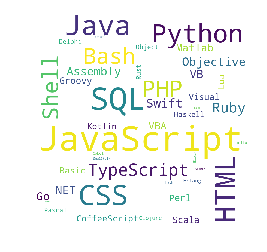

In [13]:

my_wordcloud = WordCloud(background_color='white',width=800,height=800,
                         max_words = 200,collocations=False).generate(wl_space_split)
#collocations=False控制有无重复的词频
plt.imshow(my_wordcloud)
plt.axis("off")

plt.show()


> 计算频率转用Tableau，Python有点麻烦，但代码不删除，见下

In [32]:
# 输出每个语言的频率
import nltk

a = list(jieba.cut(ftext))
cfd = nltk.FreqDist(a)

In [40]:
cfd.pop(' ')
cfd.pop('#')
cfd.pop("'")
cfd.pop(',')
cfd.pop('-')
cfd.pop('.')
cfd.pop('/')
cfd.pop('6')
cfd.pop(';')

509373

In [45]:
# 字典转化成dataframe
df = pd.DataFrame(cfd,index=[0])

In [63]:
df1 = np.array(df)
df2 = df1.tolist()
print(df2)

[[7583, 31172, 4158, 32875, 39430, 28027, 50979, 1423, 590, 3795, 273, 145, 2025, 380, 1167, 1572, 7089, 4566, 53628, 361, 2610, 50045, 77561, 568, 3508, 273, 3772, 6133, 7527, 2025, 7859, 470, 34361, 2025, 4865, 42063, 6447, 11235, 2273, 63424, 4729, 31172, 327, 8678, 17114, 7527, 5384, 4158]]


In [66]:
df.columns

Index(['Assembly', 'Bash', 'Basic', 'C', 'C#', 'C++', 'CSS', 'Clojure',
       'Cobol', 'CoffeeScript', 'Common', 'Dart', 'Delphi', 'Elixir', 'Erlang',
       'F', 'Go', 'Groovy', 'HTML', 'Hack', 'Haskell', 'Java', 'JavaScript',
       'Julia', 'Kotlin', 'Lisp', 'Lua', 'Matlab', 'NET', 'Object',
       'Objective', 'Ocaml', 'PHP', 'Pascal', 'Perl', 'Python', 'R', 'Ruby',
       'Rust', 'SQL', 'Scala', 'Shell', 'Smalltalk', 'Swift', 'TypeScript',
       'VB', 'VBA', 'Visual'],
      dtype='object')

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

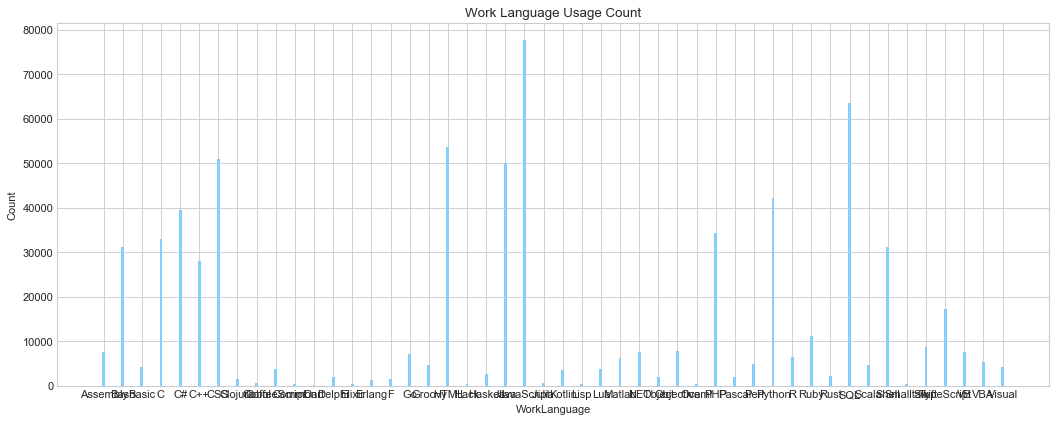

In [69]:
plt.figure(figsize=(16, 6), dpi=80)
# 柱子总数
N = df.shape[1] 
# 包含每个柱子对应值的序列
values = (7583, 31172, 4158, 32875, 39430, 28027, 50979, 1423, 590, 3795, 273, 145, 2025, 380, 1167, 1572, 7089, 4566, 53628, 361, 2610, 
          50045, 77561, 568, 3508, 273, 3772, 6133, 7527, 2025, 7859, 470, 34361, 2025, 4865, 42063, 6447, 11235, 2273, 63424, 4729, 31172, 
          327, 8678, 17114, 7527, 5384, 4158)

# 包含每个柱子下标的序列
index = np.arange(N)
# 柱子的宽度
width = 0.15

# 绘制柱状图, 每根柱子的颜色为紫罗兰色
p2 = plt.bar(index, values, width, label="rainfall", color="#87CEFA")

# 设置横轴标签
plt.xlabel('WorkLanguage')
# 设置纵轴标签
plt.ylabel('Count')

# 添加标题
plt.title('Work Language Usage Count')

# 添加纵横轴的刻度
plt.xticks(index, ('Assembly', 'Bash', 'Basic', 'C', 'C#', 'C++', 'CSS', 'Clojure',
       'Cobol', 'CoffeeScript', 'Common', 'Dart', 'Delphi', 'Elixir', 'Erlang',
       'F', 'Go', 'Groovy', 'HTML', 'Hack', 'Haskell', 'Java', 'JavaScript',
       'Julia', 'Kotlin', 'Lisp', 'Lua', 'Matlab', 'NET', 'Object',
       'Objective', 'Ocaml', 'PHP', 'Pascal', 'Perl', 'Python', 'R', 'Ruby',
       'Rust', 'SQL', 'Scala', 'Shell', 'Smalltalk', 'Swift', 'TypeScript',
       'VB', 'VBA', 'Visual'))

plt.show()
